In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 64s 90ms/step - loss: 0.2831 - accuracy: 0.8824 - val_loss: 0.2414 - val_accuracy: 0.8950
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1914 - accuracy: 0.9197 - val_loss: 0.2068 - val_accuracy: 0.9122
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.1623 - accuracy: 0.9345 - val_loss: 0.2043 - val_accuracy: 0.9186
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1353 - accuracy: 0.9443 - val_loss: 0.2135 - val_accuracy: 0.9174
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1176 - accuracy: 0.9524 - val_loss: 0.2284 - val_accuracy: 0.9140
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0986 - accuracy: 0.9627 - val_loss: 0.2624 - val_accuracy: 0.9012
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0746 - accuracy: 0.9725 - val_loss: 0.2529 - val_accurac

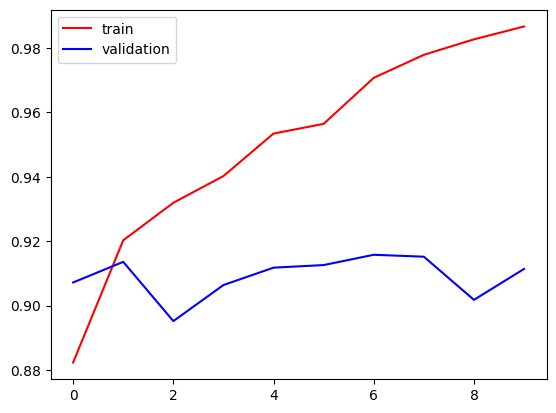

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

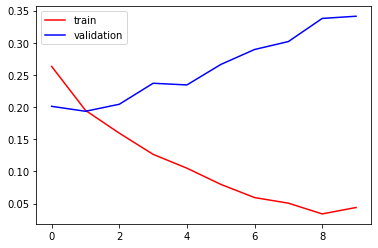

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
import cv2 as cv
import numpy as np
import argparse
import time
import cv2

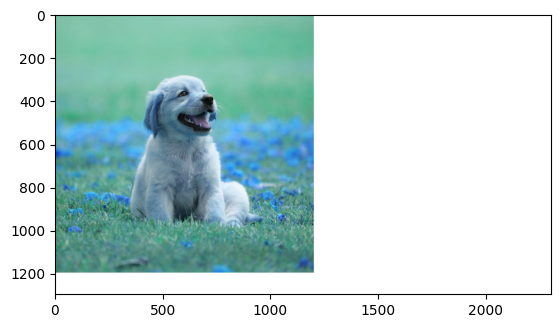

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt



img = cv.imread('/content/dog.jpg')
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)


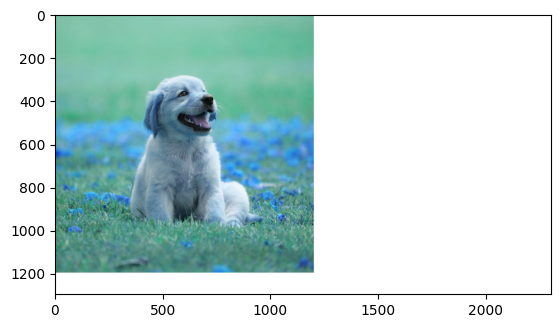

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.resize(img,(150,150))

In [ ]:
test_input = img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

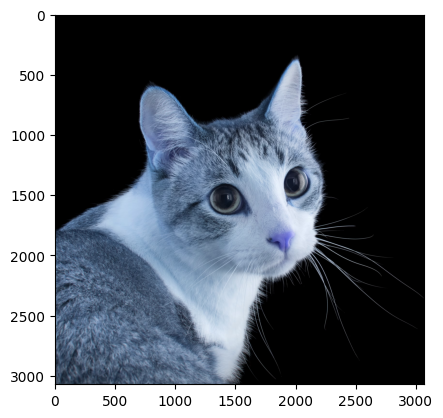

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt



img = cv.imread('/content/cat.jpg')
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)


In [ ]:
img = cv2.resize(img,(150,150))

In [ ]:
test_input = img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)